In [16]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import numpy.linalg as la

from matplotlib.animation import FuncAnimation

In [17]:
def make_sym(A):
    tmp = np.triu(A)
    return tmp + tmp.T

N = 200
n = 4
period = 40
offset = 2
tensor = np.zeros((N,n,n))
num_elem = n*(n-1)//2
xs, ys = np.triu_indices(n, k=1)
shift = np.zeros((n, n))
for i in range(num_elem):
    shift[xs[i],ys[i]] = -i*offset
for i in range(N):
    tmp = np.sin(i*((2*np.pi)/period) + shift)
    tmp = np.triu(tmp,k=1)
    tmp = tmp + tmp.T
    tmp = (tmp+1)/2
    np.fill_diagonal(tmp, 0)
    tensor[i] = tmp
#tensor += np.random.normal(loc=0.5, scale=0.091, size=(N, n, n))

In [18]:
shift

array([[  0.,   0.,  -2.,  -4.],
       [  0.,   0.,  -6.,  -8.],
       [  0.,   0.,   0., -10.],
       [  0.,   0.,   0.,   0.]])

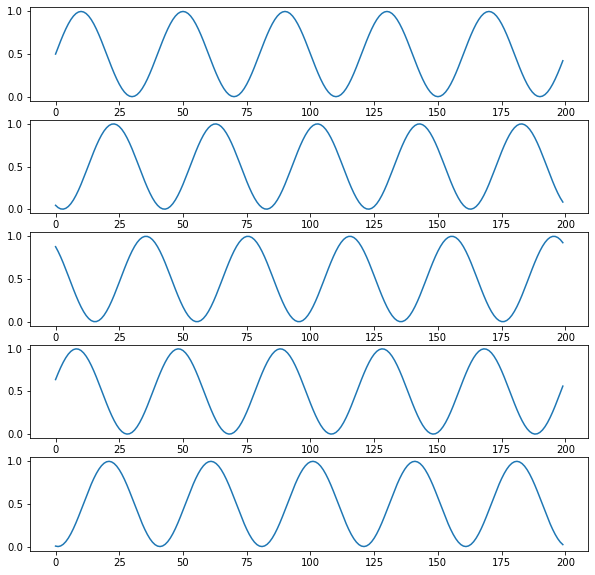

In [19]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(tensor[:,xs[i],ys[i]])

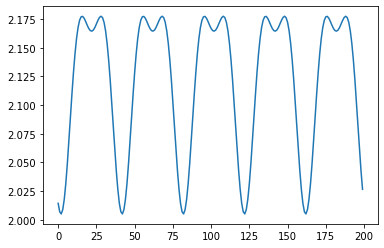

In [20]:
norm = np.array([la.norm(adj) for adj in tensor])
plt.plot(np.arange(len(tensor)), norm)

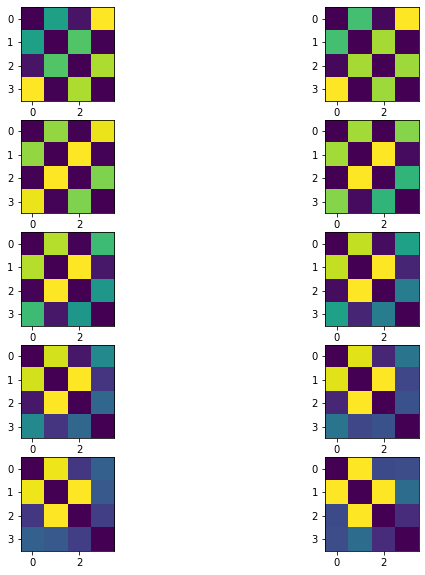

In [21]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(tensor[i])

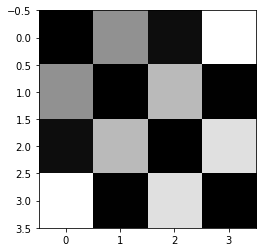

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [22]:
def animate_tensor(tensor, N, save_path):
    global im
    global display_tensor
    display_tensor = tensor
    fig = plt.figure()
    im = plt.imshow(display_tensor[0], cmap=plt.get_cmap("gray"), animated = True)
    ani = FuncAnimation(fig, animate, interval = 100, frames = N, blit=True)
    plt.show()
    ani.save(save_path)

def animate(i):
    global im
    im.set_array(display_tensor[i])
    return im,

animate_tensor(tensor, N, "adj_mat_cont.gif")